<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Carlos Felipe Martínez Martínez</h1>
  <h3 class="alert-heading">Trabajo #5</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sio

<font color='SteelBlue' size=4><p style='text-align: justify;'>**DataFrame de Azul de Timol**

In [2]:
Datos = pd.read_excel("./Datos/Datos-azul-timol (1).xlsx", header=None,  usecols=[1,3,5], nrows=20)
Datos

,1,3,5
0,NaN,NaN,NaN
1,Absorbancia,Absorbancia,Absorbancia
2,0.002,0.002,0.002
3,0.1,0.09,0.089
4,0,0,-0.001
5,0.276,0.267,0.267
6,-0.001,-0.001,-0.002
7,0.484,0.482,0.483
8,-0.001,0.001,0.001
9,0.674,0.66,0.659


In [3]:
abc=Datos.drop([0, 1, 4, 6, 8, 10, 12, 14, 16, 18])
abc

,1,3,5
2,0.002,0.002,0.002
3,0.1,0.09,0.089
5,0.276,0.267,0.267
7,0.484,0.482,0.483
9,0.674,0.66,0.659
11,0.877,0.877,0.877
13,1.042,1.04,1.04
15,1.267,1.267,1.266
17,1.479,1.478,1.477
19,1.644,1.64,1.688


<font color='SteelBlue' size=4><p style='text-align: justify;'>**DataFrame de la desviación estandar y el promedio**

In [4]:
Desvest=np.std(abc, axis=1)
Desvest_3=Desvest*3
Desviacion={'Desviación':Desvest_3}
Desviacion=pd.DataFrame(Desviacion, columns=['Desviación'])
Desviacion

,Desviación
2,0.000000e+00
3,1.489966e-02
5,1.272792e-02
7,2.449490e-03
9,2.054264e-02
11,3.330669e-16
13,2.828427e-03
15,1.414214e-03
17,2.449490e-03
19,6.523803e-02


In [5]:
Promediocurva=abc.mean(axis=1)
Promedio={'Promedio réplicas':Promediocurva, 'Concentración' :[0, 0.000003475, 0.000010425, 0.000017375, 0.000024325, 0.000031275, 0.000038225, 0.000045175, 0.000051125, 0.000059075]}
Promedio=pd.DataFrame(Promedio, columns=['Promedio réplicas', 'Concentración'])
Promedio

,Promedio réplicas,Concentración
2,0.002000,0.000000
3,0.093000,0.000003
5,0.270000,0.000010
7,0.483000,0.000017
9,0.664333,0.000024
11,0.877000,0.000031
13,1.040667,0.000038
15,1.266667,0.000045
17,1.478000,0.000051
19,1.657333,0.000059


In [6]:
x=Promedio[['Concentración']] 
y=Promedio[['Promedio réplicas']]

<font color='SteelBlue' size=4><p style='text-align: justify;'>**Curva de calibración Timol**

In [7]:
import sklearn.metrics as skm
from sklearn import linear_model
x=Promedio[['Concentración']] 
y=Promedio[['Promedio réplicas']]
reg = linear_model.LinearRegression()
reg.fit(x, y)
y1_pred = reg.predict(x)
m=reg.coef_[0]
b=reg.intercept_[0]
mse=skm.mean_squared_error(y, y1_pred)
r2=skm.r2_score(y, y1_pred)

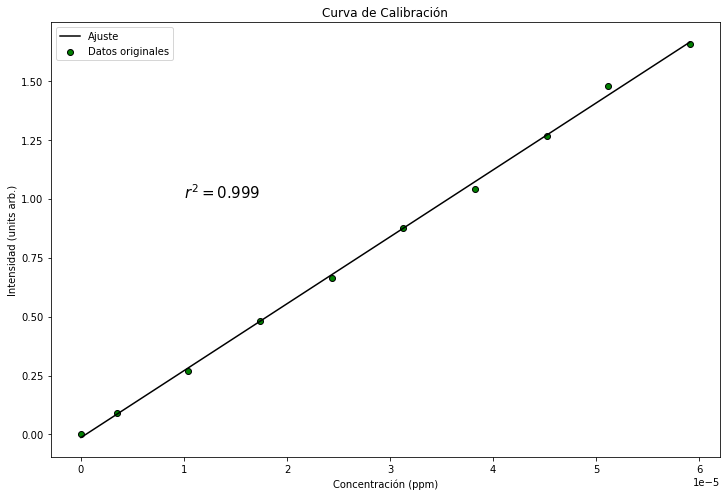

In [8]:
fig, ax= plt.subplots(figsize=(12,8))
ax.scatter(x, y, color='g', label='Datos originales', edgecolors='black')
ax.plot(np.array(x), np.array(y1_pred), color='k', label='Ajuste')
ax.legend()
ax.set_title("Curva de Calibración")
ax.set_xlabel("Concentración (ppm)")


ax.set_ylabel("Intensidad (units arb.)")
ax.text(0.00001, 1, r"$r^2 = "+str("{0:.3f}".format(r2))+r"$", fontsize=15, color="k")
#ax.errorbar(x, y, np.array(yerr=Desviacion));

plt.show()
fig.savefig("curvadecalibtimol.pdf",bbox_inches='tight')

<font color='red' size=6><p style='text-align: justify;'>**Ejercicio 2**

In [9]:
Aromaticos = pd.read_excel('./Datos/Informacion Crudos20.xlsx', header=None, usecols=[1,9], nrows=66)
Aromaticos

,1,9
0,NaN,NaN
1,DESCRIPCION DE LA MUESTRA,Aromaticos(%w)
2,VASCONIA BLEND,29.15
3,CAÑO LIMON,32.42
4,CARGA U 2000,39.84
...,...,...
61,CRUDO MAGDALENA BLEND K9627GRB,40.93
62,DOROTEA,NaN
63,ARAGUANEY,29.75
64,CAPACHOS,24.78


In [10]:
espectros = pd.read_excel('./Datos/ASCI_IR.xlsx', header=None)
espectros

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,10.000000,10.000000,13.000000,11.000000,11.000000,14.000000,10.000000,14.000000,16.000000,18.000000,...,9.000000,13.000000,11.000000,12.000000,13.000000,8.000000,10.000000,9.000000,11.000000,12.000000
1,0.011097,0.012468,0.018689,0.015869,0.006940,0.006935,0.016425,0.025610,0.011233,0.015542,...,0.037838,0.025816,0.017109,0.014263,0.040873,0.012003,0.015255,0.014519,0.012098,0.036427
2,0.011199,0.012486,0.018286,0.015885,0.006977,0.007533,0.015106,0.025668,0.010532,0.015678,...,0.036763,0.026283,0.017330,0.014050,0.040392,0.012234,0.014849,0.015313,0.013569,0.036521
3,0.010985,0.012449,0.017887,0.015737,0.006766,0.008007,0.013928,0.025952,0.010026,0.015707,...,0.035667,0.026582,0.017588,0.013578,0.039723,0.012054,0.014527,0.016455,0.014856,0.036305
4,0.010543,0.012386,0.017561,0.015513,0.006420,0.008331,0.013067,0.026408,0.009778,0.015686,...,0.034714,0.026754,0.017884,0.012980,0.038974,0.011595,0.014288,0.017791,0.015892,0.035926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,0.007530,0.003969,0.000003,0.011448,0.003147,0.007675,0.000036,0.000014,0.005132,0.000014,...,0.000014,0.008548,0.006177,0.000067,0.000043,0.000535,0.011689,0.011839,0.004210,0.000015
7465,0.007522,0.003970,0.000000,0.011453,0.003144,0.007688,0.000037,0.000009,0.005135,0.000016,...,0.000013,0.008553,0.006172,0.000068,0.000029,0.000533,0.011687,0.011844,0.004211,0.000013
7466,0.007512,0.003973,0.000001,0.011460,0.003142,0.007699,0.000038,0.000005,0.005138,0.000017,...,0.000011,0.008556,0.006168,0.000068,0.000017,0.000533,0.011686,0.011849,0.004208,0.000010
7467,0.007503,0.003975,0.000006,0.011469,0.003143,0.007707,0.000037,0.000002,0.005140,0.000017,...,0.000006,0.008556,0.006164,0.000069,0.000007,0.000534,0.011684,0.011856,0.004203,0.000005


In [11]:
#from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import scipy.io #scipy.io me permite leer datos construidos en matlab
from scipy import stats # importando scipy.stats
from scipy.signal import savgol_filter
import scipy as sio
%matplotlib inline

In [12]:
espectros = pd.read_excel('./Datos/ASCI_IR.xlsx', header=None)  
Propiedad_1 = pd.read_excel('./Datos/Informacion Crudos20.xlsx', header=None, usecols=[9], )
Propiedad_2 = Propiedad_1.drop(Propiedad_1.index[[0]])

Propiedad_2 = Propiedad_1.drop([0,1])
Propiedad_2.columns=['Aromaticos(%w)']
Propiedad_2

,Aromaticos(%w)
2,29.15
3,32.42
4,39.84
5,26
6,26.04
...,...
80,NaN
81,NaN
82,NaN
83,NaN


In [13]:
espectros = pd.read_excel('./Datos/ASCI_IR.xlsx', header=None) 
espectros

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,10.000000,10.000000,13.000000,11.000000,11.000000,14.000000,10.000000,14.000000,16.000000,18.000000,...,9.000000,13.000000,11.000000,12.000000,13.000000,8.000000,10.000000,9.000000,11.000000,12.000000
1,0.011097,0.012468,0.018689,0.015869,0.006940,0.006935,0.016425,0.025610,0.011233,0.015542,...,0.037838,0.025816,0.017109,0.014263,0.040873,0.012003,0.015255,0.014519,0.012098,0.036427
2,0.011199,0.012486,0.018286,0.015885,0.006977,0.007533,0.015106,0.025668,0.010532,0.015678,...,0.036763,0.026283,0.017330,0.014050,0.040392,0.012234,0.014849,0.015313,0.013569,0.036521
3,0.010985,0.012449,0.017887,0.015737,0.006766,0.008007,0.013928,0.025952,0.010026,0.015707,...,0.035667,0.026582,0.017588,0.013578,0.039723,0.012054,0.014527,0.016455,0.014856,0.036305
4,0.010543,0.012386,0.017561,0.015513,0.006420,0.008331,0.013067,0.026408,0.009778,0.015686,...,0.034714,0.026754,0.017884,0.012980,0.038974,0.011595,0.014288,0.017791,0.015892,0.035926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,0.007530,0.003969,0.000003,0.011448,0.003147,0.007675,0.000036,0.000014,0.005132,0.000014,...,0.000014,0.008548,0.006177,0.000067,0.000043,0.000535,0.011689,0.011839,0.004210,0.000015
7465,0.007522,0.003970,0.000000,0.011453,0.003144,0.007688,0.000037,0.000009,0.005135,0.000016,...,0.000013,0.008553,0.006172,0.000068,0.000029,0.000533,0.011687,0.011844,0.004211,0.000013
7466,0.007512,0.003973,0.000001,0.011460,0.003142,0.007699,0.000038,0.000005,0.005138,0.000017,...,0.000011,0.008556,0.006168,0.000068,0.000017,0.000533,0.011686,0.011849,0.004208,0.000010
7467,0.007503,0.003975,0.000006,0.011469,0.003143,0.007707,0.000037,0.000002,0.005140,0.000017,...,0.000006,0.008556,0.006164,0.000069,0.000007,0.000534,0.011684,0.011856,0.004203,0.000005


In [14]:
espectros_2 = espectros.transpose()
espectros_2

,0,1,2,3,4,5,6,7,8,9,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
0,10.0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
1,10.0,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
2,13.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
3,11.0,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
4,11.0,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,8.0,0.012003,0.012234,0.012054,0.011595,0.011025,0.010495,0.010095,0.009845,0.009712,...,0.000554,0.000552,0.000548,0.000543,0.000539,0.000535,0.000533,0.000533,0.000534,0.000538
78,10.0,0.015255,0.014849,0.014527,0.014288,0.014117,0.013987,0.013858,0.013693,0.013464,...,0.011690,0.011689,0.011688,0.011688,0.011689,0.011689,0.011687,0.011686,0.011684,0.011684
79,9.0,0.014519,0.015313,0.016455,0.017791,0.019159,0.020383,0.021306,0.021820,0.021896,...,0.011802,0.011811,0.011820,0.011828,0.011834,0.011839,0.011844,0.011849,0.011856,0.011863
80,11.0,0.012098,0.013569,0.014856,0.015892,0.016641,0.017102,0.017313,0.017343,0.017274,...,0.004172,0.004182,0.004192,0.004201,0.004207,0.004210,0.004211,0.004208,0.004203,0.004196


In [15]:
Full= Propiedad_2.join(espectros_2, on=None,  how= 'right')
Full.dropna(inplace = True)
Full

,Aromaticos(%w),0,1,2,3,4,5,6,7,8,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
2,29.15,13.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,...,0.000043,3.526030e-05,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,1.274435e-05
3,32.42,11.0,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,...,0.011477,1.146486e-02,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,1.148033e-02
4,39.84,11.0,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,...,0.003165,3.165104e-03,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,3.144747e-03
5,26,14.0,0.006935,0.007533,0.008007,0.008331,0.008482,0.008453,0.008236,0.007844,...,0.007645,7.642930e-03,0.007645,0.007651,0.007662,0.007675,0.007688,0.007699,0.007707,7.710565e-03
6,26.04,10.0,0.016425,0.015106,0.013928,0.013067,0.012639,0.012648,0.012992,0.013508,...,0.000033,2.996445e-05,0.000029,0.000031,0.000033,0.000036,0.000037,0.000038,0.000037,3.638567e-05
7,34,14.0,0.025610,0.025668,0.025952,0.026408,0.026994,0.027671,0.028401,0.029129,...,0.000061,4.856126e-05,0.000038,0.000029,0.000021,0.000014,0.000009,0.000005,0.000002,0.000000e+00
8,30.3,16.0,0.011233,0.010532,0.010026,0.009778,0.009770,0.009901,0.010021,0.009995,...,0.005115,5.119202e-03,0.005122,0.005125,0.005128,0.005132,0.005135,0.005138,0.005140,5.141381e-03
9,25.16,18.0,0.015542,0.015678,0.015707,0.015686,0.015676,0.015717,0.015814,0.015947,...,0.000000,8.426448e-07,0.000003,0.000007,0.000011,0.000014,0.000016,0.000017,0.000017,1.516786e-05
10,8.13,16.0,0.006624,0.006846,0.006878,0.006786,0.006664,0.006602,0.006648,0.006787,...,0.023228,2.324714e-02,0.023263,0.023274,0.023281,0.023283,0.023283,0.023282,0.023282,2.328219e-02
11,32.9,12.0,0.012977,0.012802,0.012407,0.011908,0.011426,0.011040,0.010778,0.010613,...,0.006645,6.643886e-03,0.006644,0.006646,0.006649,0.006652,0.006653,0.006653,0.006653,6.651965e-03


In [16]:
data_prop=Full['Aromaticos(%w)']
data_prop

2     29.15
3     32.42
4     39.84
5        26
6     26.04
7        34
8      30.3
9     25.16
10     8.13
11     32.9
12    28.54
13    25.74
14    28.97
15     8.13
16     9.29
17    27.62
18    31.36
19      8.3
20    29.78
21    30.41
22    29.01
23    29.18
24     28.1
25     28.1
26     36.9
28    30.78
29     15.8
30    35.66
31    28.57
32     22.7
33    29.65
34     30.8
35     31.5
36     29.5
37      9.4
39     26.3
40    28.18
41     36.9
42    33.45
43    41.42
44    41.16
47    34.52
48    45.31
49    50.76
50    43.37
51    48.54
52    37.35
53    37.83
54    35.39
55     50.5
56    37.98
58    34.58
59    39.01
60    18.66
61    40.93
63    29.75
64    24.78
65    28.16
66    41.72
68    45.53
Name: Aromaticos(%w), dtype: object

In [17]:
Full.drop(['Aromaticos(%w)'], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
2,13.0,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,...,0.000043,3.526030e-05,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,1.274435e-05
3,11.0,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,...,0.011477,1.146486e-02,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,1.148033e-02
4,11.0,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,...,0.003165,3.165104e-03,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,3.144747e-03
5,14.0,0.006935,0.007533,0.008007,0.008331,0.008482,0.008453,0.008236,0.007844,0.007311,...,0.007645,7.642930e-03,0.007645,0.007651,0.007662,0.007675,0.007688,0.007699,0.007707,7.710565e-03
6,10.0,0.016425,0.015106,0.013928,0.013067,0.012639,0.012648,0.012992,0.013508,0.014046,...,0.000033,2.996445e-05,0.000029,0.000031,0.000033,0.000036,0.000037,0.000038,0.000037,3.638567e-05
7,14.0,0.025610,0.025668,0.025952,0.026408,0.026994,0.027671,0.028401,0.029129,0.029793,...,0.000061,4.856126e-05,0.000038,0.000029,0.000021,0.000014,0.000009,0.000005,0.000002,0.000000e+00
8,16.0,0.011233,0.010532,0.010026,0.009778,0.009770,0.009901,0.010021,0.009995,0.009744,...,0.005115,5.119202e-03,0.005122,0.005125,0.005128,0.005132,0.005135,0.005138,0.005140,5.141381e-03
9,18.0,0.015542,0.015678,0.015707,0.015686,0.015676,0.015717,0.015814,0.015947,0.016107,...,0.000000,8.426448e-07,0.000003,0.000007,0.000011,0.000014,0.000016,0.000017,0.000017,1.516786e-05
10,16.0,0.006624,0.006846,0.006878,0.006786,0.006664,0.006602,0.006648,0.006787,0.006954,...,0.023228,2.324714e-02,0.023263,0.023274,0.023281,0.023283,0.023283,0.023282,0.023282,2.328219e-02
11,12.0,0.012977,0.012802,0.012407,0.011908,0.011426,0.011040,0.010778,0.010613,0.010499,...,0.006645,6.643886e-03,0.006644,0.006646,0.006649,0.006652,0.006653,0.006653,0.006653,6.651965e-03


In [20]:
scaler=StandardScaler()
norma=Normalizer()

scaler.fit(Full)
x_scaled=scaler.transform(Full)
x_norm = preprocessing.normalize(Full, norm='l1')
x_nsd = savgol_filter(x_norm, 17, polyorder=2, deriv=2)

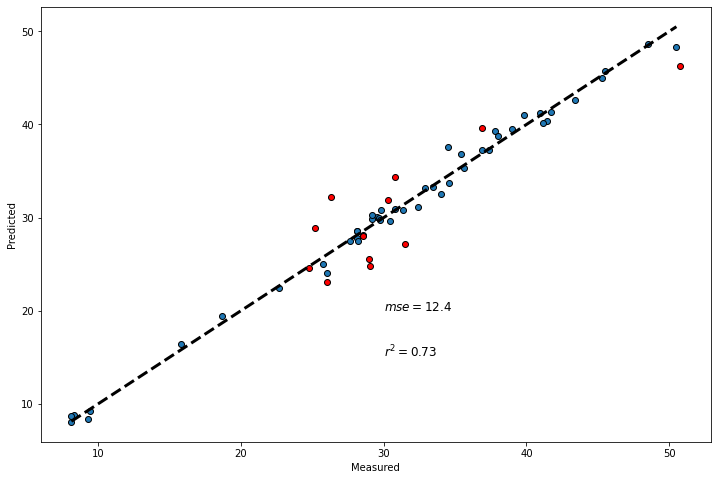

MSE = 12.4


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, data_prop, train_size=0.8, random_state=4, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(30,20, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(30,15, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)))